In [1]:
pip install yfinance pandas matplotlib



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf              # For downloading historical stock data (from Yahoo Finance)
import pandas as pd                # For manipulating tabular data
import matplotlib.pyplot as plt    # For plotting charts


In [3]:
# Define ticker and timeframe
ticker = "AAPL"                      # Change to any stock, e.g. 'AAPL' for Apple
start_date = "2024-09-11"            # Set the date one year back from today
end_date = "2025-09-11"

# Download data
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# Optional: To get more than one year, change 'start_date'.
# For intraday data, change interval to '1h' or '5m'.


/tmp/ipykernel_8530/1990539876.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [4]:
data['MA_9'] = data['Close'].rolling(window=9, min_periods=1).mean()
data['MA_20'] = data['Close'].rolling(window=20, min_periods=1).mean()

# Optional: Change window to 50, 100, etc. for longer-term MAs


In [9]:
import numpy as np

# Drop rows with missing data
data = data.dropna(subset=[('Open', 'AAPL'), ('Close', 'AAPL')])

# Create candle colors
conditions = [
    data[('Close', 'AAPL')] > data[('Open', 'AAPL')],
    data[('Close', 'AAPL')] < data[('Open', 'AAPL')]
]
choices = ['green', 'red']

data[('Candle', '')] = np.select(conditions, choices, default='doji')

# Optional: If you want to use this for another stock, just change 'AAPL' to your ticker.


In [10]:
# Track if 9-MA is above or below 20-MA
data['MA_Above'] = data['MA_9'] > data['MA_20']   # True if above, False if below

# For crossovers: Find places where 9-MA crosses from below to above
data['MA_Crossover'] = data['MA_Above'].ne(data['MA_Above'].shift()) & data['MA_Above']

# Optional: To check both cross up and cross down, change the condition


In [11]:
# 1. When 9-MA is below 20-MA
below = data.loc[data['MA_Above'] == False]
red_below = below['Candle'].value_counts().get('red', 0)
green_below = below['Candle'].value_counts().get('green', 0)

# 2. After crossover, while 9-MA stays above 20-MA
above = data.loc[data['MA_Above'] == True]
red_above = above['Candle'].value_counts().get('red', 0)
green_above = above['Candle'].value_counts().get('green', 0)

print(f"Period: 9-MA Below 20-MA: Red={red_below} Green={green_below}")
print(f"Period: 9-MA Above 20-MA: Red={red_above} Green={green_above}")

# Optional: To get rolling counts for each contiguous period, use groupby and enumerate contiguous blocks where MA_Above stays True or False.


Period: 9-MA Below 20-MA: Red=50 Green=56
Period: 9-MA Above 20-MA: Red=62 Green=81


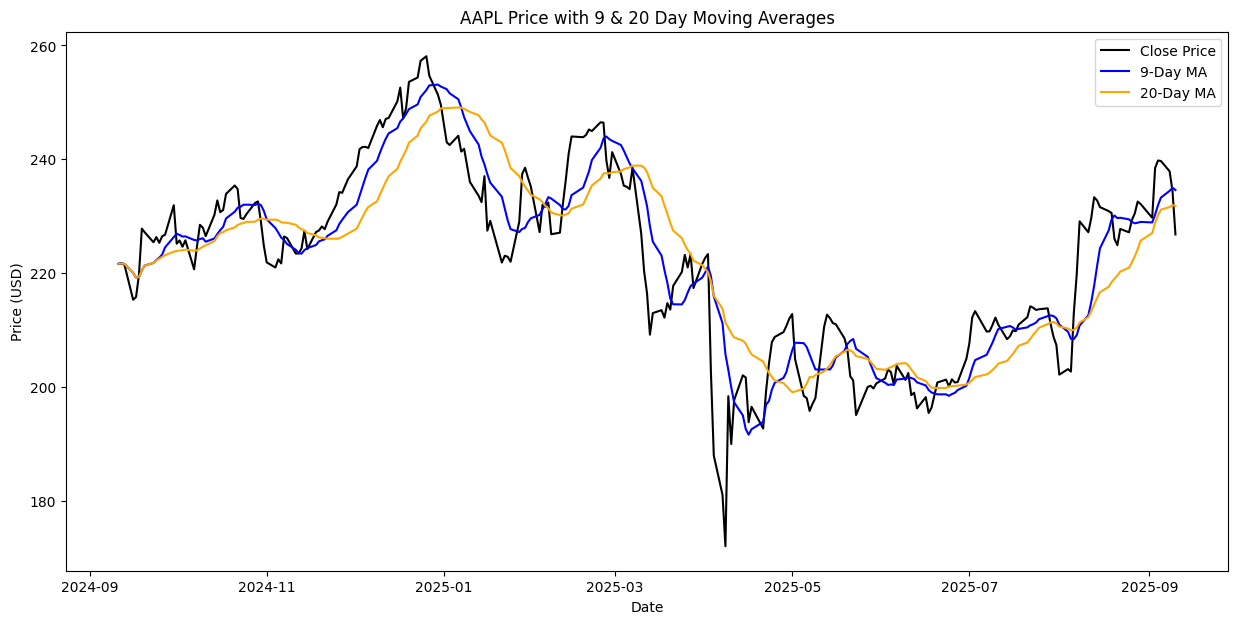

In [12]:
plt.figure(figsize=(15,7))
plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index, data['MA_9'], label='9-Day MA', color='blue')
plt.plot(data.index, data['MA_20'], label='20-Day MA', color='orange')
plt.title(f'{ticker} Price with 9 & 20 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Optional: Use .iloc to zoom in or plot certain date ranges. Change color schemes or add crossover markers with plt.scatter.


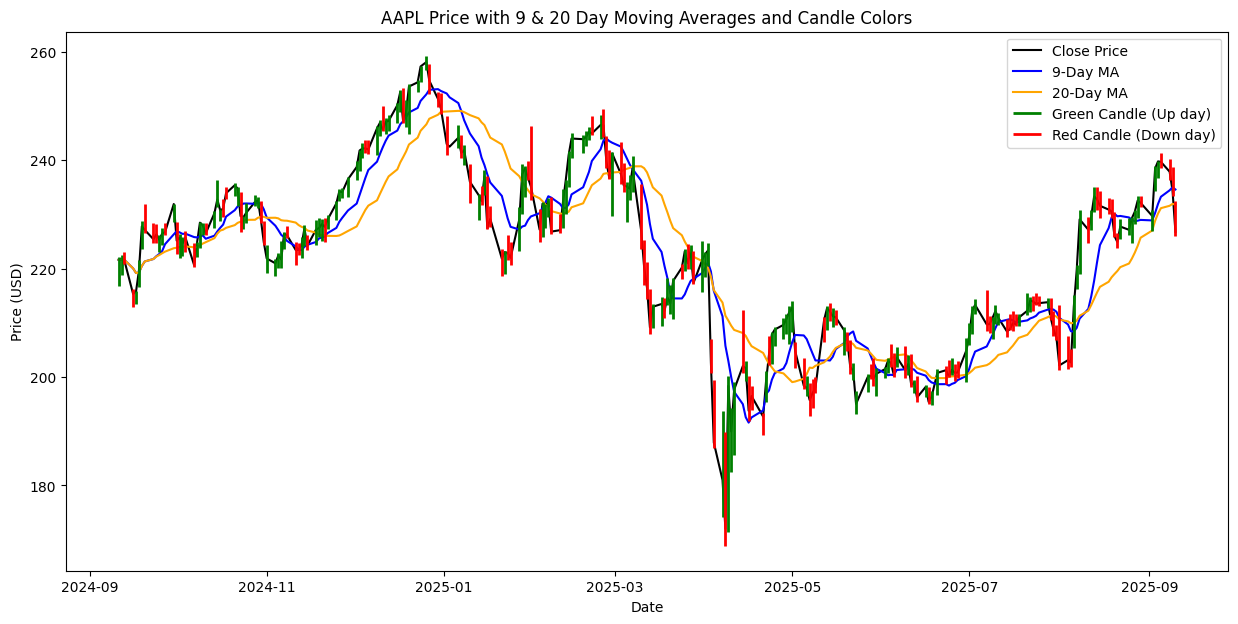

In [13]:
# Assume data and plotting code is above

# Separate green (close > open) and red (close < open) days
green_days = data[data[('Candle', '')] == 'green']
red_days = data[data[('Candle', '')] == 'red']

plt.figure(figsize=(15,7))

# Plot Close price and moving averages as before
plt.plot(data.index, data[('Close','AAPL')], label='Close Price', color='black')
plt.plot(data.index, data[('MA_9','')], label='9-Day MA', color='blue')
plt.plot(data.index, data[('MA_20','')], label='20-Day MA', color='orange')

# Plot green/red “candles” as vertical lines at each date
plt.vlines(green_days.index, 
           ymin=green_days[('Low','AAPL')], 
           ymax=green_days[('High','AAPL')], 
           color="green", lw=2, label='Green Candle (Up day)')

plt.vlines(red_days.index, 
           ymin=red_days[('Low','AAPL')], 
           ymax=red_days[('High','AAPL')], 
           color="red", lw=2, label='Red Candle (Down day)')

plt.title('AAPL Price with 9 & 20 Day Moving Averages and Candle Colors')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
